hash func: key val to fixed num val.
- same key = same value
- ensures o(1) 

in the worst case, all keys have the same index so o(n)

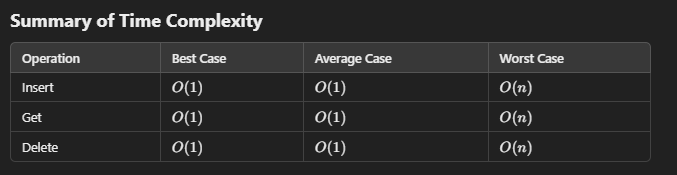

In [1]:
class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [ [] for _ in range(size)]

    def hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self.hash_function(key)

        # check key exists
        for kv_pair in self.table[index]:
            if kv_pair[0] == key:
                kv_pair[1] = value  # update
                return
            
        # add if doesnt exist
        self.table[index].append([key, value])

    
    def get(self, key):
        index = self.hash_function(key)
        
        for kv_pair in self.table[index]:
            if kv_pair[0] == key:
                return kv_pair[1]
        return None 
    
    def delete(self, key):
        index = self.hash_function(key)

        for kv_pair in self.table[index]:
            if kv_pair[0] == key:
                self.table[index].remove(kv_pair)
                return
    
    def print_table(self):
        for i, pair in enumerate(self.table):
            print(f"{i}: {pair}")
                


In [2]:

ht = HashTable()

ht.insert("apple", 10)
ht.insert("banana", 20)
ht.insert("orange", 30)
ht.insert("mango", 40)

print("Hash Table:")
ht.print_table()

print("\nRetrieve Values:")
print("apple:", ht.get("apple"))  
print("banana:", ht.get("banana"))  
print("grape:", ht.get("grape"))  


print("\nDelete 'banana':")
ht.delete("banana")
ht.print_table()

print("\nInsert keys with collisions:")
ht.insert("grape", 50)
ht.insert("peach", 60)
ht.print_table()

Hash Table:
0: [['mango', 40]]
1: []
2: []
3: [['orange', 30]]
4: [['apple', 10]]
5: []
6: []
7: [['banana', 20]]
8: []
9: []

Retrieve Values:
apple: 10
banana: 20
grape: None

Delete 'banana':
0: [['mango', 40]]
1: []
2: []
3: [['orange', 30]]
4: [['apple', 10]]
5: []
6: []
7: []
8: []
9: []

Insert keys with collisions:
0: [['mango', 40]]
1: []
2: []
3: [['orange', 30]]
4: [['apple', 10]]
5: [['grape', 50]]
6: [['peach', 60]]
7: []
8: []
9: []


- ---------- best  -  avr  -  worst
- insert------ o(1)    o(1)    o(n)
- get-------- o(1)    o(1)    o(n)
- delete----- o(1)    o(1)    o(n)

## alternative

In [6]:
class HashTable:
    def __init__(self, size=5):
        self.size = size
        self.table = [[] for _ in range(size)]  

    def _hash(self, key):
        # hash function: sum the ASCII values of the key's characters and mod by size
        return sum(ord(char) for char in str(key)) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        bucket = self.table[index]

        # check if the key already exists
        for i, (k, v) in enumerate(bucket):
            if k == key:
                bucket[i] = (key, value)  # update the value 
                return

        # if the key doesn't exist, append the new key-value
        bucket.append((key, value))

    def get(self, key):
        index = self._hash(key)
        bucket = self.table[index]     # find key and corresponding values

        # search for the key in the bucket
        for k, v in bucket:
            if k == key:
                return v  # return the value if the key is found

        raise KeyError(f"Key '{key}' not found")

    def delete(self, key):
        index = self._hash(key)
        bucket = self.table[index]

        # search for the key in the bucket and remove it
        for i, (k, v) in enumerate(bucket):
            if k == key:
                del bucket[i]
                return

        raise KeyError(f"Key '{key}' not found")

    def __str__(self):
        return "\n".join(f"{i}: {bucket}" for i, bucket in enumerate(self.table))

# example Usage
if __name__ == "__main__":
    ht = HashTable()

    ht.insert("name", "Alice")
    ht.insert("age", 25)
    ht.insert("city", "Wonderland")

    print(ht)  

    print("Name:", ht.get("name"))  
    print("Age:", ht.get("age"))    

    ht.delete("age")
    print("After deleting 'age':")
    print(ht)

    try:
        print(ht.get("age"))  # raise a KeyError
    except KeyError as e:
        print(e)

0: []
1: [('age', 25), ('city', 'Wonderland')]
2: [('name', 'Alice')]
3: []
4: []
Name: Alice
Age: 25
After deleting 'age':
0: []
1: [('city', 'Wonderland')]
2: [('name', 'Alice')]
3: []
4: []
"Key 'age' not found"
